In [ ]:
#%% 

#load model
from transformers import AutoModelForVision2Seq, AutoProcessor

from peft import LoraConfig, get_peft_model
from peft import PeftModel, PeftConfig
import torch
import requests
from PIL import Image
from transformers import Blip2Processor, Blip2ForConditionalGeneration
import datasets

peft_model_id = "./trained_model"
config = PeftConfig.from_pretrained(peft_model_id)
processor = AutoProcessor.from_pretrained("Salesforce/blip2-opt-2.7b")
model = Blip2ForConditionalGeneration.from_pretrained("Salesforce/blip2-opt-2.7b", torch_dtype=torch.float16)
# model = PeftModel.from_pretrained(model, peft_model_id)

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

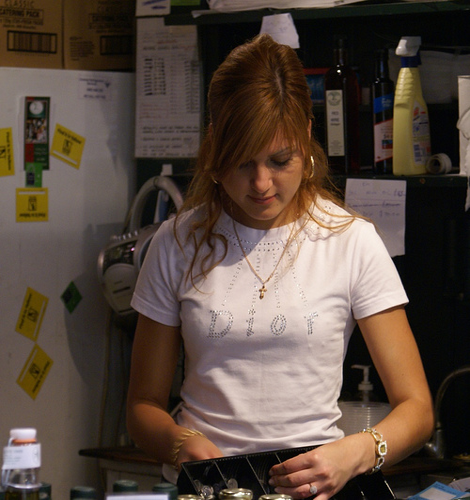

['A young woman with blond-hair and a pink Dior t-shirt checking under the cash drawer.', 'A young woman in a white Dior t-shirt lifting a silverware drawer in a kitchen.', 'A woman wearing a white top with Dior on front holding the cash register till', 'A woman in a white shirt holding a cash drawer.', 'A woman in a white shirt is in a kitchen.']


In [ ]:
#%%

# load data

from datasets import load_dataset
from PIL import Image
from IPython.display import display
data_files = {
    'train' : './dataset/0.parquet',
    'test' : './dataset/1.parquet'
}
dataset = load_dataset('parquet', data_files=data_files)
test = dataset['test']
device = "cuda" if torch.cuda.is_available() else "cpu"


image = test['image'][0].convert('RGB')
caption = test['caption'][0]
display(image.resize((470,500)))
print(caption)

In [ ]:
#%%

# eval
inputs = processor(image, return_tensors="pt").to(device, torch.float16)
model = model.to(device)
generated_ids = model.generate(**inputs, max_new_tokens=20)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()
print(generated_text)
# A young woman with blond-hair and a pink Dior t-shirt checking under the cash drawer.', 'A young woman in a white Dior t-shirt lifting a silverware drawer in a kitchen.', 'A woman wearing a white top with Dior on front holding the cash register till', 'A woman in a white shirt holding a cash drawer.', 'A woman in a white shirt is in a kitchen.']
# A woman wearing a white shirt and a black skirt is preparing food in a kitchen.

OutOfMemoryError: CUDA out of memory. Tried to allocate 50.00 MiB (GPU 0; 23.87 GiB total capacity; 6.33 GiB already allocated; 48.50 MiB free; 6.55 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [ ]:
#%%

# eval
inputs = processor(image, return_tensors="pt").to(device, torch.float16)
model = model.to(device)
generated_ids = model.generate(**inputs, max_new_tokens=20)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()
print(generated_text)
# A young woman with blond-hair and a pink Dior t-shirt checking under the cash drawer.', 'A young woman in a white Dior t-shirt lifting a silverware drawer in a kitchen.', 'A woman wearing a white top with Dior on front holding the cash register till', 'A woman in a white shirt holding a cash drawer.', 'A woman in a white shirt is in a kitchen.']
# A woman wearing a white shirt and a black skirt is preparing food in a kitchen.

Both `max_new_tokens` (=20) and `max_length`(=51) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


a woman in a kitchen
